<a href="https://colab.research.google.com/github/smahla/Data-analysis-projects/blob/main/US_accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US Accidents

### Dataset Info
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020. Currently there are about 4.2 millions accident records in this dataset.

Source - Kaggle

In [1]:
# getting dataset
!pip install kaggle --quiet
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
import getpass

username = input('Enter username : ')
key = getpass.getpass('Enter key : ')

api_token = {"username":username,"key":key}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

Enter username : sachinkumar20
Enter key : ··········


In [2]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 98% 284M/290M [00:02<00:00, 103MB/s] 
100% 290M/290M [00:03<00:00, 100MB/s]


In [3]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_Updated.csv  


### Importing and Cleaning Data

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
us_acc = pd.read_csv('/content/US_Accidents_Dec20_Updated.csv')
us_acc.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


#### Knowing data

In [6]:
# Columns
us_acc.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
# Size of data
len(us_acc)

2906610

In [8]:
# Data types of columns
us_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
# getting info about numerical columns
us_acc.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


#### Cleaning data

In [10]:
# getting count of null values in columns
null_counts = us_acc.isna().sum().sort_values(ascending=False)
null_counts[null_counts > 0]

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
dtype: int64

### Data Analysis and Visualization

Columns we will be using for analysis
1. State 
2. City
3. Start time
4. Weather condition
5. Temperature
6. Severity 
7. Other Factors such as Bump, Crossing, No_Exit, Roundabout etc. 
  


#### State

In [11]:
# State
accidents_by_state = us_acc['State'].value_counts()
accidents_by_state.head()

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
Name: State, dtype: int64

In [12]:
# adding ranks to state
def get_rank(state):
  value = accidents_by_state[state]
  accidents_by_state_rank = pd.Index(accidents_by_state)
  rank = accidents_by_state_rank.get_loc(value)
  print(rank)

In [13]:
get_rank('NY')

3


In [14]:
accidents_by_state[:10]

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
Name: State, dtype: int64

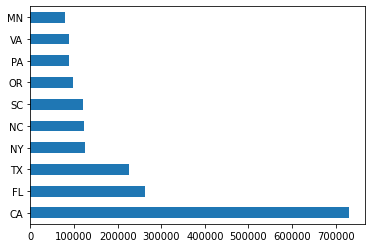

In [15]:
accidents_by_state[:10].plot(kind='barh')

#### City

In [16]:
# City
accidents_by_city = us_acc['City'].value_counts()
accidents_by_city[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

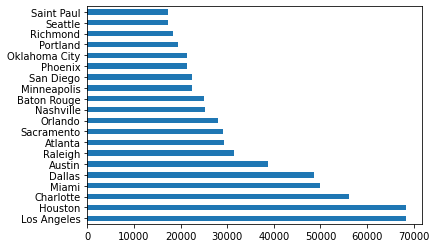

In [17]:
# getting a graph
accidents_by_city[:20].plot(kind='barh')

#### NY Details

In [18]:
# Check if NY in States:
'NY' in list(us_acc['State'])

True

In [19]:
us_acc['State'].unique()

array(['SC', 'NC', 'CA', 'NV', 'FL', 'CO', 'TN', 'NY', 'TX', 'AZ', 'NJ',
       'MI', 'GA', 'VA', 'IN', 'LA', 'PA', 'MN', 'OH', 'MD', 'CT', 'IL',
       'MO', 'OR', 'NE', 'OK', 'UT', 'WA', 'AL', 'WI', 'MA', 'DC', 'MS',
       'KS', 'KY', 'ME', 'IA', 'WV', 'AR', 'ID', 'RI', 'WY', 'NM', 'MT',
       'NH', 'DE', 'ND', 'SD', 'VT'], dtype=object)

In [20]:
# Check if New York in cities
'New York' in list(us_acc['City'])

True

In [21]:
# Check where New York ranks in cities
x = list(accidents_by_city)
# Check again

#### Weather

In [22]:
# Weather
weather_values = us_acc['Weather_Condition'].value_counts()
weather_values[:10]

Fair                692680
Clear               498925
Mostly Cloudy       386122
Partly Cloudy       268851
Cloudy              245054
Overcast            237068
Light Rain          140946
Scattered Clouds    127090
Light Snow           39941
Fog                  33424
Name: Weather_Condition, dtype: int64

#### Temperature(F)

In [23]:
# Temperature
temperature_values = us_acc['Temperature(F)'].value_counts()

In [24]:
temperature_values[:10]

68.0    62008
59.0    60192
77.0    59625
73.0    57029
63.0    56585
        ...  
20.0     2048
12.0     2037
17.1     1875
96.1     1827
10.0     1803
Name: Temperature(F), Length: 153, dtype: int64

In [25]:
# getting numerical extracts from temperature
us_acc['Temperature(F)'].describe() 

count    2.839386e+06
mean     6.098873e+01
std      1.845258e+01
min     -8.900000e+01
25%      4.890000e+01
50%      6.300000e+01
75%      7.500000e+01
max      2.030000e+02
Name: Temperature(F), dtype: float64

75 % accidents showing below 75 F temperature 

In [26]:
max_temp = us_acc['Temperature(F)'].max()
us_acc[us_acc['Temperature(F)'] == max_temp]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1296553,A-1296554,3,2020-07-17 11:41:59,2020-07-17 12:26:37,32.670929,-97.062508,32.670929,-97.062508,0.0,Main roadway closed due to accident on TX-360 ...,NaN,TX-360 N,R,Arlington,Tarrant,TX,76018,US,US/Central,KGKY,2020-07-17 11:53:00,203.0,NaN,35.0,29.4,10.0,NaN,NaN,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
min_temp = us_acc['Temperature(F)'].min()
us_acc[us_acc['Temperature(F)'] == min_temp]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
324984,A-324985,3,2020-04-03 07:56:58,2020-04-03 08:56:58,39.778300,-104.906070,39.77830,-104.90607,0.0,At Quebec St/Exit 278 - Accident. Two lanes bl...,NaN,I-70 W,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
605819,A-605820,2,2020-04-03 07:50:12,2020-04-03 09:36:00,39.741428,-104.998894,NaN,NaN,0.0,Accident on Stout St at Speer Blvd. No recent ...,1543.0,Speer Blvd,R,Denver,Denver,CO,80204,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,True,False,False,False,True,False,False,False,False,True,False,Day,Day,Day,Day
752476,A-752477,2,2020-04-03 07:23:13,2020-04-03 08:43:11,39.729290,-105.025200,39.72929,-105.02520,0.0,At Lowell Blvd - Accident.,3001.0,W 6th Ave,L,Denver,Denver,CO,80204,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,True,False,False,True,False,False,False,False,False,True,False,Day,Day,Day,Day


#### Start Time

In [28]:
type(us_acc['Start_Time'][0])

str

In [29]:
us_acc['Start_Time'] = pd.to_datetime(us_acc['Start_Time'])

In [30]:
type(us_acc['Start_Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


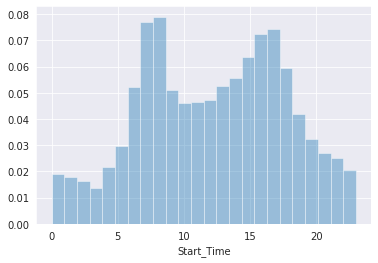

In [31]:
# get graph for accidents at what time of day
sns.set_style('darkgrid')
sns.distplot(us_acc['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

Most accidents seems to be between 8AM to 10AM, then 3PM to 6PM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


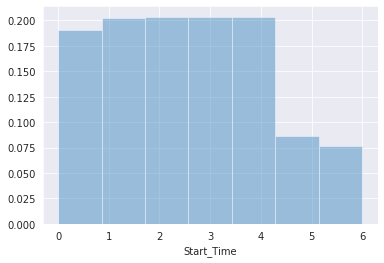

In [32]:
# get graph for accidents on week of the day
sns.distplot(us_acc['Start_Time'].dt.weekday, bins=7, kde=False, norm_hist=True)

Seems less accidents on weekend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


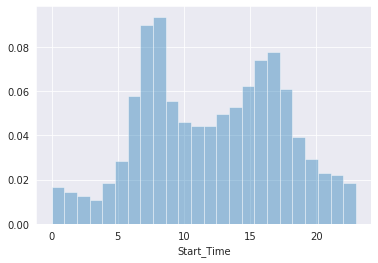

In [33]:
# Check day time of accidents on weekdays comparitively to weekend
monday_data = us_acc[us_acc['Start_Time'].dt.dayofweek == 1 ]
sns.distplot(monday_data['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


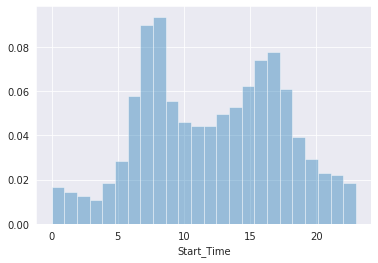

In [34]:
monday_data = us_acc[us_acc['Start_Time'].dt.dayofweek == 1 ]
sns.distplot(monday_data['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

Change in time of accidents on weekdays and weekend

#### Severity

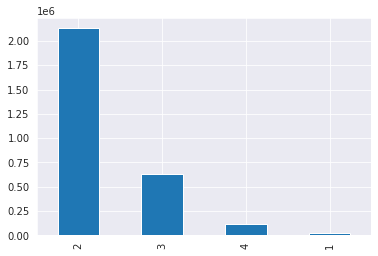

In [35]:
# How severe were accidents
severity_types = us_acc['Severity'].value_counts()
severity_types.plot(kind='bar')

#### Other Factors

In [36]:
us_acc.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [37]:
# Getting other factors that could relate to severity
other_factors = ['Severity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Roundabout', 'Stop', 'Traffic_Signal', 'Turning_Loop']
other_factors_data = us_acc[other_factors]
other_factors_data.head()

,Severity,Bump,Crossing,Give_Way,Junction,No_Exit,Roundabout,Stop,Traffic_Signal,Turning_Loop
0,2,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False
3,2,False,False,False,False,False,False,False,True,False
4,3,False,False,False,True,False,False,False,True,False


In [38]:
other_factors_data.groupby('Severity').sum()

,Bump,Crossing,Give_Way,Junction,No_Exit,Roundabout,Stop,Traffic_Signal,Turning_Loop
Severity,,,,,,,,,
1,10,9078,93,2527,120,1,500,12550,0
2,469,189236,6330,186799,2951,136,40460,387054,0
3,88,14630,1366,73034,643,0,2691,42111,0
4,12,5985,431,13717,144,5,1803,11950,0


In [39]:
# checking for turning loop values
us_acc['Turning_Loop'].value_counts()

False    2906610
Name: Turning_Loop, dtype: int64

In [40]:
# importing geopandas
!pip install geopandas --quiet
import geopandas as gpd

     |████████████████████████████████| 1.0MB 6.8MB/s 
     |████████████████████████████████| 15.3MB 258kB/s 
     |████████████████████████████████| 6.6MB 38.5MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 


In [41]:
us_shape = gpd.read_file('gz_2010_us_040_00_500k.shp')
us_shape.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,None,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,None,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,None,56538.901,"MULTIPOLYGON (((-88.68443 48.11578, -88.67563 ..."
3,0400000US30,30,Montana,None,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,None,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


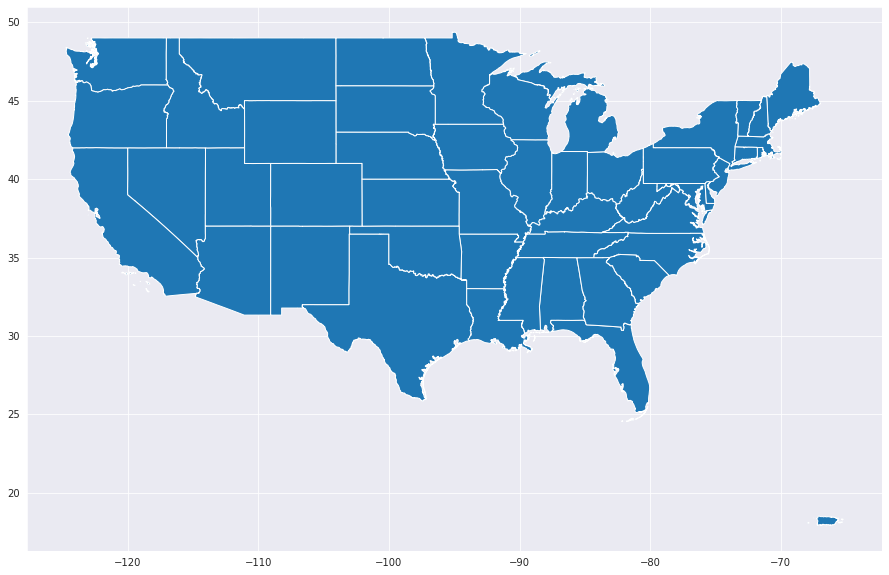

In [42]:
us_shape[us_shape['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,10))



In [43]:
us_acc.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [44]:
us_acc[['Start_Lat','Start_Lng']].head()

,Start_Lat,Start_Lng
0,34.808868,-82.269157
1,35.090080,-80.745560
2,37.145730,-121.985052
3,39.110390,-119.773781
4,26.102942,-80.265091


In [45]:
us_acc['coordinates'] = us_acc[['Start_Lng','Start_Lat']].values.tolist()
us_acc['coordinates'].head()

0    [-82.26915699999998, 34.808868]
1              [-80.74556, 35.09008]
2            [-121.985052, 37.14573]
3            [-119.773781, 39.11039]
4            [-80.265091, 26.102942]
Name: coordinates, dtype: object

In [46]:
from shapely.geometry import Point
us_acc['coordinates'] = us_acc['coordinates'].apply(Point)

In [47]:
us_acc = gpd.GeoDataFrame(us_acc, geometry='coordinates')
us_acc.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,coordinates
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-82.26916 34.80887)
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-80.74556 35.09008)
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,POINT (-121.98505 37.14573)
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,POINT (-119.77378 39.11039)
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day,POINT (-80.26509 26.10294)


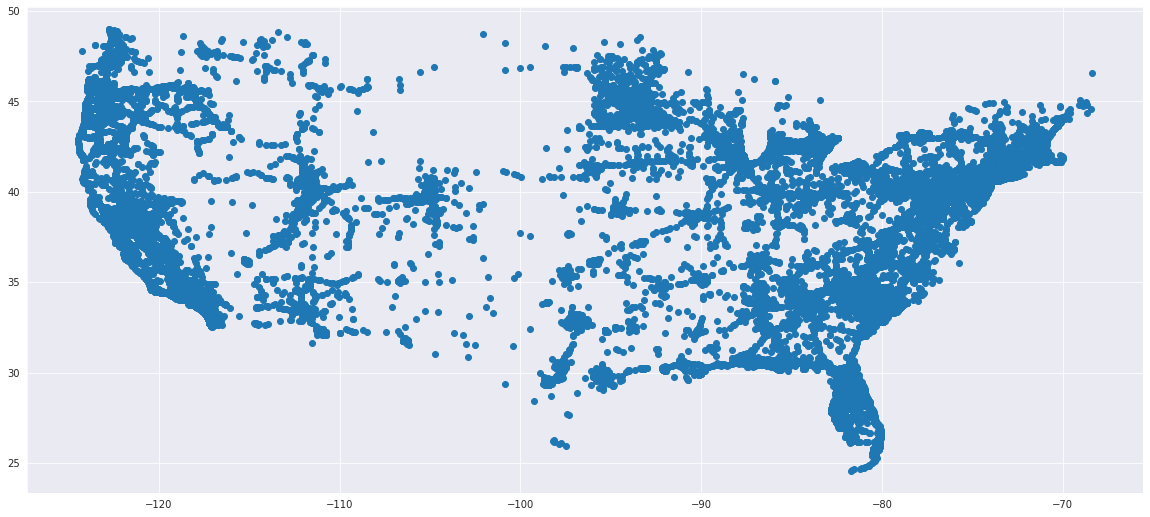

In [48]:
us_acc.sample(100000).plot(figsize=(20,10));

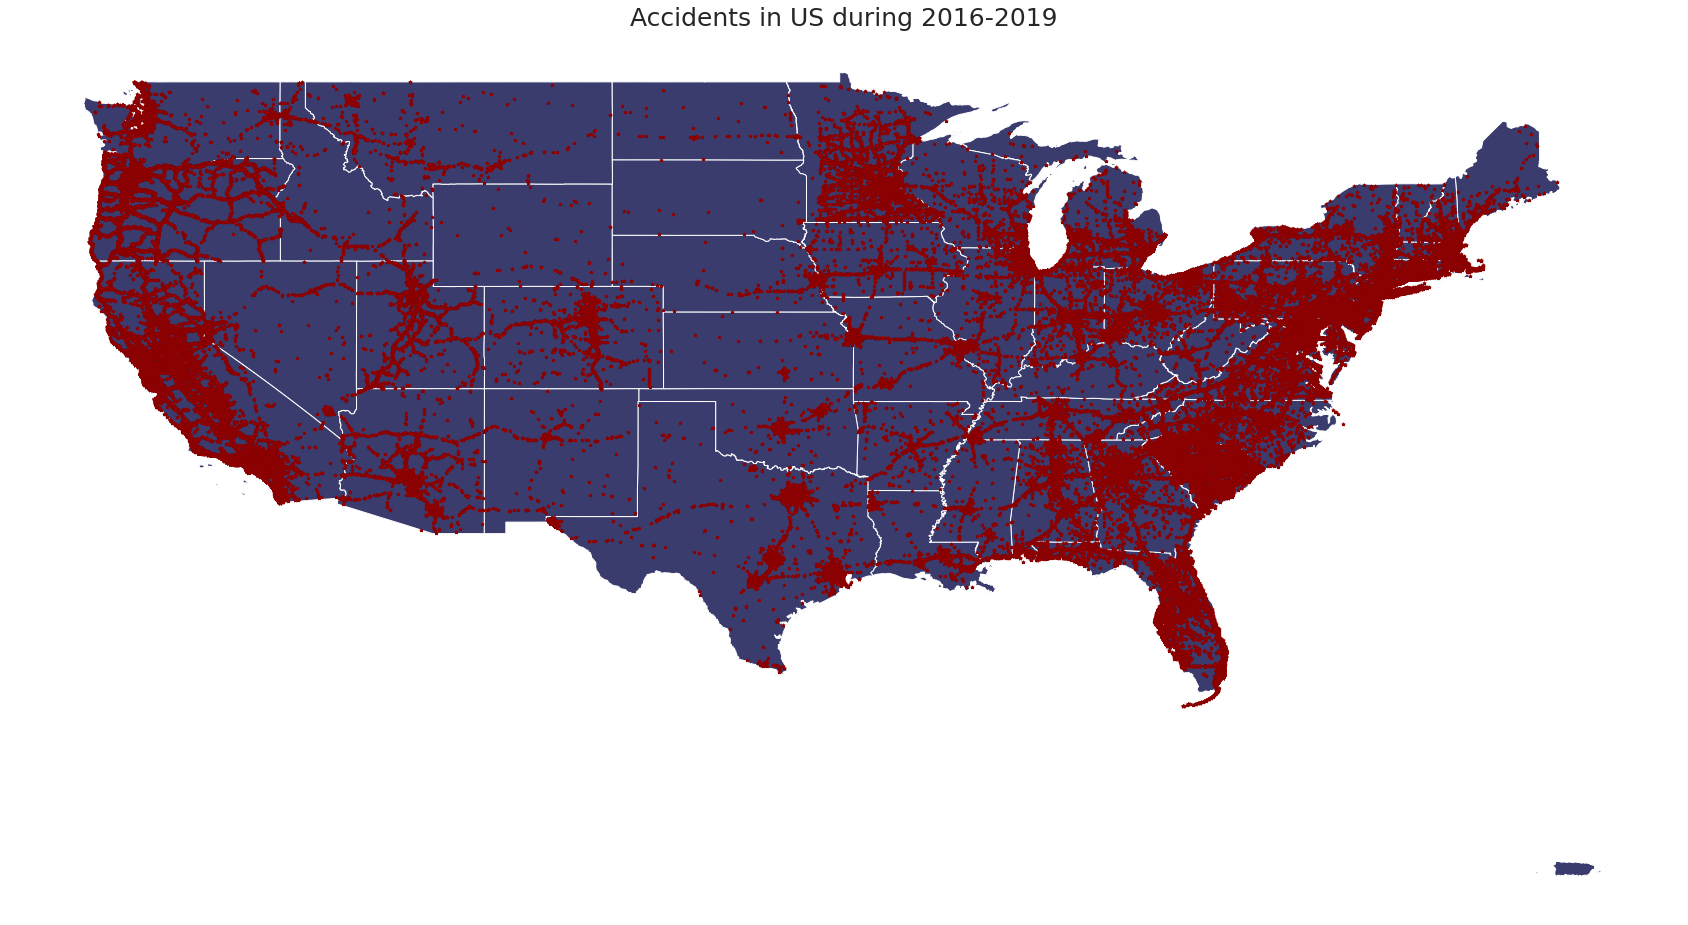

In [49]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_shape[us_shape['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

us_acc.sample(500000).plot(ax=base, color='darkred', marker="*", markersize=10);
_ = ax.axis('off')
ax.set_title("Accidents in US during 2016-2019", fontsize=25)
plt.savefig('US_accidents.png',bbox_inches='tight');